<a href="https://colab.research.google.com/github/cloudpendyala/pendyala_ai/blob/main/Embeddings_Cosine_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install necessary libraries
!pip install faiss-cpu transformers
# Import libraries and load model
from transformers import AutoTokenizer, AutoModel
import torch
import faiss
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [6]:
# Load pre-trained model and tokenizer
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

In [7]:
def embed_text(text):
   inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
   with torch.no_grad():
       embeddings = model(**inputs)
   return embeddings.last_hidden_state.mean(dim=1).squeeze().numpy()

In [59]:
# Example words
words = ["India", "USA", "Lion", "Tiger", "Toyota", "Honda", "Germany", "Ford", "Bear"]
embeddings = [embed_text(word) for word in words]
# Convert embeddings to numpy array
embedding_matrix = np.vstack(embeddings).astype('float32')
# Create FAISS index
index = faiss.IndexFlatL2(embedding_matrix.shape[1])
index.add(embedding_matrix)
# Perform a similarity search
D, I = index.search(embedding_matrix, k=2)  # We search for the closest 2 vectors for each word
# Calculate Cosine Similarity
cos_sim_matrix = cosine_similarity(embedding_matrix)
# Print the results
for i, word in enumerate(words):
   print(f"Word: {word}")
   for j in range(1, len(I[i])):
       print(f"  Closest: {words[I[i][j]]} (Distance: {D[i][j]}, Cosine Similarity: {cos_sim_matrix[i][I[i][j]]})")


Word: India
  Closest: USA (Distance: 33.282657623291016, Cosine Similarity: 0.6853786110877991)
Word: USA
  Closest: India (Distance: 33.282657623291016, Cosine Similarity: 0.6853786110877991)
Word: Lion
  Closest: Tiger (Distance: 40.24932861328125, Cosine Similarity: 0.6639968156814575)
Word: Tiger
  Closest: Lion (Distance: 40.24932861328125, Cosine Similarity: 0.6639968156814575)
Word: Toyota
  Closest: Ford (Distance: 44.902679443359375, Cosine Similarity: 0.6773984432220459)
Word: Honda
  Closest: Toyota (Distance: 50.81740951538086, Cosine Similarity: 0.6556447744369507)
Word: Germany
  Closest: USA (Distance: 33.65394973754883, Cosine Similarity: 0.6700152158737183)
Word: Ford
  Closest: Toyota (Distance: 44.902679443359375, Cosine Similarity: 0.6773984432220459)
Word: Bear
  Closest: Tiger (Distance: 67.33615112304688, Cosine Similarity: 0.4173933267593384)


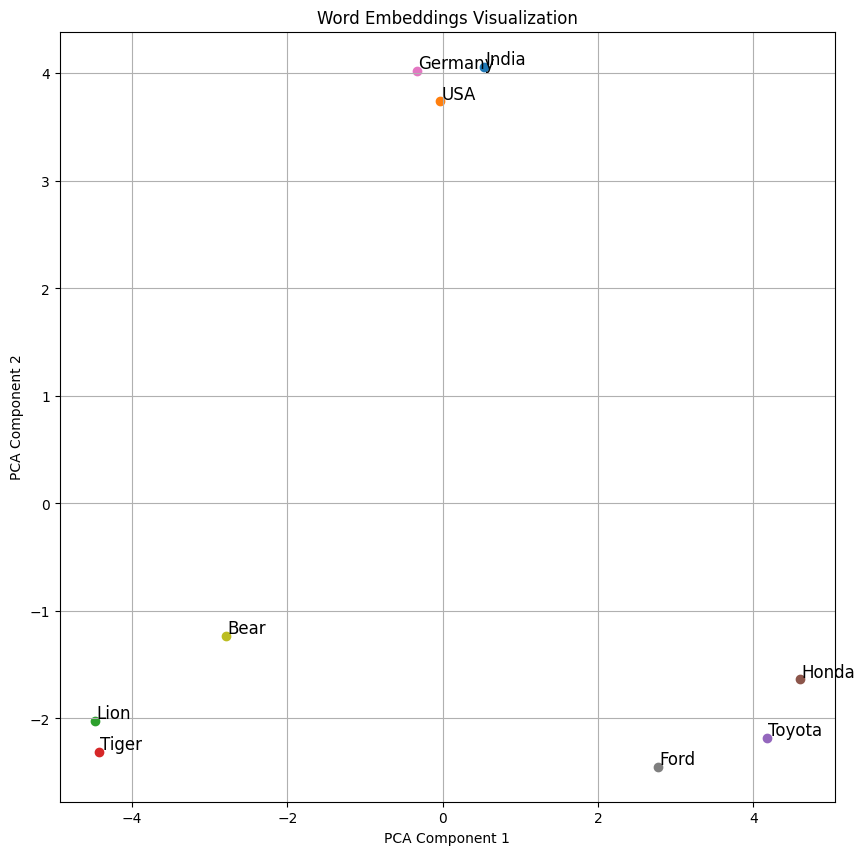

In [60]:
# Reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_matrix)
# Plot
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
   x, y = reduced_embeddings[i]
   plt.scatter(x, y)
   plt.text(x+0.02, y+0.02, word, fontsize=12)
plt.title('Word Embeddings Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()